In [76]:
import numpy as np 
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image


Import an image using the Python Imaging Library (or whatever you're comfortable with)

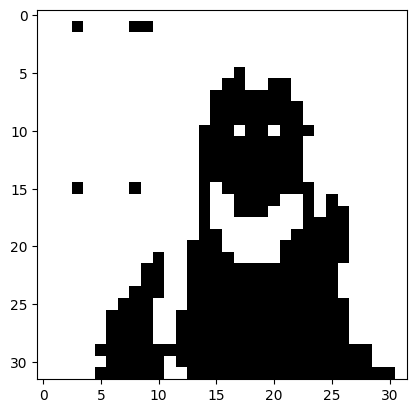

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img = Image.open(r'C:\Users\tommy\Downloads\orangutan.bmp')  # Replace with your file path

# Set the threshold value for a black vs white pixel
threshold = 7  # This may vary depending on your image

# Convert image to grayscale
img_gray = img.convert('L')

# Convert image to a list of pixels
pixels = list(img_gray.getdata())

# Convert data list to contain only black or white
newPixels = []
for pixel in pixels:
    # If pixel intensity is less than or equal to threshold, convert to black
    if pixel <= threshold:
        newPixel = 0  # Black
    # If pixel intensity is greater than threshold, convert to white
    else:
        newPixel = 255  # White
    newPixels.append(newPixel)

# Convert new pixels back to an image
newImg = Image.new('L', img_gray.size)
newImg.putdata(newPixels)

# Print the new black and white image
plt.imshow(newImg, cmap='gray')
plt.show()

# Save the new black and white image
newImg.save('black_and_white_orangutan.bmp')


From the files you generated by performing BB84, import Alice and Bob's keys. You'll likely need to append multiple files to get a sufficient key size.

In [57]:
import csv

# Function to process a CSV file and return the data in separate lists
def process_csv(file_path):
    basis = []
    bit = []
    detect = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        for row in reader:
            if len(row) > 3:  # Check if row has at least four columns
                basis.append(row[1])
                bit.append(row[2])
                detect.append(row[3])
    return basis, bit, detect

# Example usage:
bobs_basis, bobs_bit, bobs_detect = process_csv(r"C:\Users\tommy\OneDrive\Desktop\Bob_Total.csv")
alices_basis, alices_bit, alices_detect = process_csv(r"C:\Users\tommy\OneDrive\Desktop\Alice_Total.csv")

# Now you can use the lists separately for Bob and Alice
print("Bob's Basis:", bobs_basis)
print("Bob's Bit:", bobs_bit)
print("Bob's Detect:", bobs_detect)

print("Alice's Basis:", alices_basis)
print("Alice's Bit:", alices_bit)
print("Alice's Detect:", alices_detect)


Bob's Basis: ['BASIS', 'X', 'X', '+', 'X', 'X', 'X', '+', '+', 'X', 'X', 'X', 'X', 'X', '+', '+', '+', 'X', 'X', 'X', '+', 'X', 'X', 'X', '+', '+', 'X', '+', '+', 'X', '+', 'X', 'X', '+', '+', '+', '+', 'X', '+', 'X', 'X', '+', '+', '+', '+', 'X', '+', '+', 'X', '+', '+', 'X', 'X', '+', 'X', 'X', 'X', 'X', '+', '+', 'X', '+', 'X', '+', '+', '+', 'X', 'X', '+', '+', '+', '+', '+', '+', '+', 'X', 'X', 'X', 'X', '+', 'X', 'X', '+', 'X', '+', '+', '+', 'X', 'X', '+', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '+', 'X', 'X', '+', '+', 'X', 'X', '+', '+', '+', '+', 'X', '+', '+', '+', 'X', '+', '+', 'X', 'X', 'X', '+', '+', '+', '+', 'X', '+', 'X', 'X', 'X', '+', '+', 'X', 'X', '+', 'X', 'X', '+', '+', '+', 'X', '+', 'X', '+', '+', 'X', '+', '+', '+', 'X', '+', '+', '+', '+', '+', 'X', '+', '+', '+', '+', 'X', '+', '+', '+', 'X', '+', '+', '+', '+', 'X', 'X', 'X', '+', '+', 'X', 'X', '+', '+', 'X', '+', 'X', '+', '+', 'X', 'X', '+', 'X', '+', 'X', '+', 'X', '+', 'X', 'X', 'X', 'X', '+', '+', '+

In [80]:
import csv

# Function to process a CSV file and return the data in separate lists
def process_csv(file_path):
    basis = []
    bit = []
    detect = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        # Skip the header row, if there is one
        next(reader, None)
        for row in reader:
            if len(row) > 3:
                basis.append(row[1])
                bit.append(row[2])
                detect.append(row[3])
    return basis, bit, detect

# Load data for Bob and Alice
bobs_basis, bobs_bit, bobs_detect = process_csv(r"C:\Users\tommy\OneDrive\Desktop\Bob_Total.csv")
alices_basis, alices_bit, alices_detect = process_csv(r"C:\Users\tommy\OneDrive\Desktop\Alice_Total.csv")

# Function to filter the lists based on given conditions
def filter_entries(bob_basis, bob_bit, bob_detect, alice_basis, alice_bit, alice_detect):
    # We will collect indexes that need to be kept
    keep_indexes = []

    # Check each entry in Bob's and Alice's data
    for i in range(len(bob_basis)):
        if bob_detect[i] != 'N' and bob_basis[i] == alice_basis[i]:
            keep_indexes.append(i)

    # Create new filtered lists using the indexes we decided to keep
    filtered_bob_basis = [bob_basis[i] for i in keep_indexes]
    filtered_bob_bit = [bob_bit[i] for i in keep_indexes]
    filtered_bob_detect = [bob_detect[i] for i in keep_indexes]
    filtered_alice_basis = [alice_basis[i] for i in keep_indexes]
    filtered_alice_bit = [alice_bit[i] for i in keep_indexes]
    filtered_alice_detect = [alice_detect[i] for i in keep_indexes]

    return filtered_bob_basis, filtered_bob_bit, filtered_bob_detect, \
           filtered_alice_basis, filtered_alice_bit, filtered_alice_detect

# Apply filtering
filtered_bobs_basis, filtered_bobs_bit, filtered_bobs_detect, \
filtered_alices_basis, filtered_alices_bit, filtered_alices_detect = filter_entries(
    bobs_basis, bobs_bit, bobs_detect, alices_basis, alices_bit, alices_detect
)

# Print the results to see the effect of filtering
print("Filtered Bob's Basis:", filtered_bobs_basis)
print("Filtered Bob's Bit:", filtered_bobs_bit)
print("Filtered Bob's Detect:", filtered_bobs_detect)
print("Filtered Alice's Basis:", filtered_alices_basis)
print("Filtered Alice's Bit:", filtered_alices_bit)
print("Filtered Alice's Detect:", filtered_alices_detect)
print(len(filtered_bobs_bit))


Filtered Bob's Basis: ['X', 'X', 'X', '+', '+', 'X', '+', '+', 'X', '+', 'X', 'X', '+', '+', '+', '+', '+', 'X', 'X', '+', '+', 'X', 'X', 'X', 'X', '+', 'X', '+', '+', '+', 'X', '+', '+', '+', '+', '+', '+', 'X', '+', 'X', 'X', '+', '+', '+', '+', 'X', 'X', '+', '+', 'X', 'X', '+', 'X', '+', 'X', '+', 'X', 'X', 'X', '+', '+', '+', '+', '+', 'X', 'X', '+', '+', 'X', 'X', '+', 'X', '+', '+', 'X', 'X', 'X', 'X', '+', '+', 'X', '+', '+', 'X', '+', 'X', 'X', 'X', 'X', 'X', '+', '+', '+', '+', '+', '+', 'X', 'X', '+', 'X', 'X', 'X', '+', '+', '+', '+', 'X', 'X', '+', '+', '+', '+', '+', 'X', '+', '+', '+', '+', 'X', '+', '+', 'X', '+', 'X', 'X', '+', '+', 'X', '+', 'X', 'X', 'X', 'X', 'X', '+', 'X', '+', 'X', 'X', '+', 'X', 'X', '+', 'X', 'X', '+', 'X', '+', 'X', 'X', '+', 'X', '+', 'X', '+', 'X', 'X', '+', 'X', '+', 'X', 'X', '+', 'X', 'X', '+', 'X', '+', 'X', '+', 'X', 'X', 'X', 'X', 'X', 'X', '+', 'X', '+', 'X', '+', 'X', 'X', 'X', '+', 'X', '+', '+', '+', 'X', 'X', '+', '+', '+', '+', 'X

Using the keys, encode and decode the binary values of the image. In a one time password scheme, each bit of the key should be xor'ed with one data bit.

Encoded image:


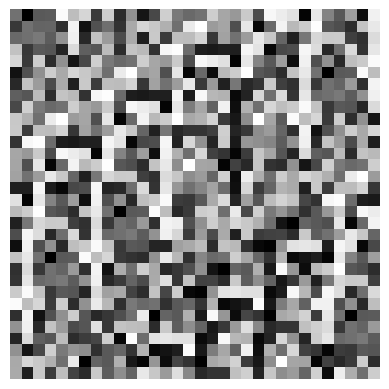

Bob's decoded image:


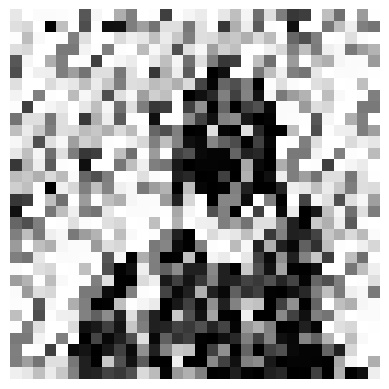

Alice's decoded image:


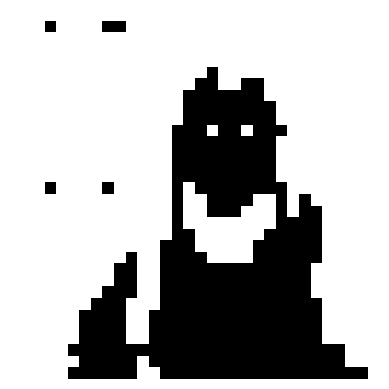

In [97]:
import os
from PIL import Image

def load_bitmap_as_bytes(image_path):
    """Load the bitmap image and return its header and data as bytes."""
    with open(image_path, "rb") as file:
        header = file.read(54)  # BMP header is typically 54 bytes
        data = file.read()      # The rest is pixel data
    return header, data

def save_bytes_as_bitmap(header, data, output_path):
    """Save the bytes back to a bitmap image."""
    with open(output_path, "wb") as file:
        file.write(header + data)

def binary_string_to_bytes(binary_list):
    """Convert a list of binary strings to a bytes object."""
    return bytes(int(''.join(binary_list), 2).to_bytes((len(''.join(binary_list)) + 7) // 8, byteorder='big'))

def xor_data(data, key):
    """XOR byte data with key."""
    # Ensure key is at least as long as data
    extended_key = (key * (len(data) // len(key) + 1))[:len(data)]
    return bytes(b ^ k for b, k in zip(data, extended_key))


# Convert binary lists to bytes
bob_key = binary_string_to_bytes(filtered_bobs_bit)
alice_key = binary_string_to_bytes(filtered_alices_bit)

# Combine keys (simplest method by concatenation and then ensuring correct length)
combined_key = bob_key + alice_key  # This is an example, adjust the method as needed

# Load the bitmap image
image_path = r"C:\Users\tommy\Downloads\black_and_white_orangutan.bmp"
header, image_bytes = load_bitmap_as_bytes(image_path)

# Check if the combined key length matches image byte length, otherwise repeat or truncate
if len(combined_key) < len(image_bytes):
    combined_key = (combined_key * ((len(image_bytes) // len(combined_key)) + 1))[:len(image_bytes)]

# Encode the image using the combined key
encoded_bytes = xor_data(image_bytes, alice_key)

# Decode the image (simulating both Alice and Bob's operation since they share the key)
decoded_bytes_bob = xor_data(encoded_bytes, bob_key)
decoded_bytes_alice = xor_data(encoded_bytes, alice_key)

# Save the encoded and decoded images to check results
save_bytes_as_bitmap(header, encoded_bytes, 'encoded3_image.bmp')
save_bytes_as_bitmap(header, decoded_bytes_bob, 'decoded_bob1_image.bmp')
save_bytes_as_bitmap(header, decoded_bytes_alice, 'decoded_alice1_image.bmp')


# Load the image
encoded2_img = Image.open('encoded3_image.bmp')
decoded_bob = Image.open('decoded_bob1_image.bmp')
decoded_alice = Image.open('decoded_alice1_image.bmp')

# Convert the image to an array
img_array = np.array(encoded2_img)
img2_array = np.array(decoded_bob)
img3_array = np.array(decoded_alice)

print("Encoded image:")
plt.imshow(img_array, cmap='gray')
plt.axis('off')  # Optional: hide axes
plt.show()

print("Bob's decoded image:")
plt.imshow(img2_array, cmap='gray')
plt.axis('off')  # Optional: hide axes
plt.show()

print("Alice's decoded image:")
plt.imshow(img3_array, cmap='gray')
plt.axis('off')  # Optional: hide axes
plt.show()


After performing encoding and decoding, you can figure out the error rate between the key pair and perform any other analysis for your report.

In [94]:
#Space for analysis of errors
same_key = []
for i in range(len(filtered_bobs_bit)):
  if (filtered_alices_bit[i] == filtered_bobs_bit[i]):
    same_key.append(filtered_alices_bit[i])

accuracy_rate = len(same_key)/len(filtered_bobs_bit)
print("Error rate:", 1- accuracy_rate)


Error rate: 0.19587628865979378
